In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pascalvoc-yolo:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F918769%2F1556326%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240807%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240807T134937Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0bebafca5f5e650408ff6626619ab582798b2ad11c86f99c7424db0eca1c73b87fdb6623ca0e3a51256b424eccad07743f111c4390eda42679f430e0aba1bc084236d76079ba98e90bdf1bbf1b500637a6a7c7575c131f0d4cc606993aacc8434aa3adf05850f3f9ac44bf7684879aaa968cc79afdf7f65c752642534b7fab2cdefaa80744488dbced3a06a362c18792f8a58b2ed4eef1507d189fb78a5450e3939bd9f2e67b9576b07868cfdfd1e673ba5c2a6ff6cd27cc3a1e6c746071c7834449996dcd3d68f71a5fd931c54c2df0b23243dc2c473868cf292bea3987d4c2a98950dad186f322e377dd1d92a33c42b13e7bd533ac04a2bb799c71e0314616'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4623578485 bytes downloaded
Downloaded and uncompressed: pascalvoc-yolo
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/pascalvoc-yolo/images/2010_006161.jpg
/kaggle/input/pascalvoc-yolo/images/2008_003730.jpg
/kaggle/input/pascalvoc-yolo/images/006421.jpg
/kaggle/input/pascalvoc-yolo/images/2010_005969.jpg
/kaggle/input/pascalvoc-yolo/images/2008_003062.jpg
/kaggle/input/pascalvoc-yolo/images/001979.jpg
/kaggle/input/pascalvoc-yolo/images/2008_008473.jpg
/kaggle/input/pascalvoc-yolo/images/008439.jpg
/kaggle/input/pascalvoc-yolo/images/2012_002330.jpg
/kaggle/input/pascalvoc-yolo/images/2009_003578.jpg
/kaggle/input/pascalvoc-yolo/images/005038.jpg
/kaggle/input/pascalvoc-yolo/images/2010_001846.jpg
/kaggle/input/pascalvoc-yolo/images/2008_006024.jpg
/kaggle/input/pascalvoc-yolo/images/2008_006607.jpg
/kaggle/input/pascalvoc-yolo/images/2008_001239.jpg
/kaggle/input/pascalvoc-yolo/images/009011.jpg
/kaggle/input/pascalvoc-yolo/images/004040.jpg
/kaggle/input/pascalvoc-yolo/images/005309.jpg
/kaggle/input/pascalvoc-yolo/images/2010_005248.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tqdm import tqdm


In [ ]:
# Defining a function to calculate Intersection over Union (IoU)
def iou(box1, box2, is_pred=True):
	if is_pred:
		# IoU score for prediction and label
		# box1 (prediction) and box2 (label) are both in [x, y, width, height] format

		# Box coordinates of prediction
		b1_x1 = box1[..., 0:1] - box1[..., 2:3] / 2
		b1_y1 = box1[..., 1:2] - box1[..., 3:4] / 2
		b1_x2 = box1[..., 0:1] + box1[..., 2:3] / 2
		b1_y2 = box1[..., 1:2] + box1[..., 3:4] / 2

		# Box coordinates of ground truth
		b2_x1 = box2[..., 0:1] - box2[..., 2:3] / 2
		b2_y1 = box2[..., 1:2] - box2[..., 3:4] / 2
		b2_x2 = box2[..., 0:1] + box2[..., 2:3] / 2
		b2_y2 = box2[..., 1:2] + box2[..., 3:4] / 2

		# Get the coordinates of the intersection rectangle
		x1 = torch.max(b1_x1, b2_x1)
		y1 = torch.max(b1_y1, b2_y1)
		x2 = torch.min(b1_x2, b2_x2)
		y2 = torch.min(b1_y2, b2_y2)
		# Make sure the intersection is at least 0
		intersection = (x2 - x1).clamp(0) * (y2 - y1).clamp(0)

		# Calculate the union area
		box1_area = abs((b1_x2 - b1_x1) * (b1_y2 - b1_y1))
		box2_area = abs((b2_x2 - b2_x1) * (b2_y2 - b2_y1))
		union = box1_area + box2_area - intersection

		# Calculate the IoU score
		epsilon = 1e-6
		iou_score = intersection / (union + epsilon)

		# Return IoU score
		return iou_score

	else:
		# IoU score based on width and height of bounding boxes

		# Calculate intersection area
		intersection_area = torch.min(box1[..., 0], box2[..., 0]) * \
							torch.min(box1[..., 1], box2[..., 1])

		# Calculate union area
		box1_area = box1[..., 0] * box1[..., 1]
		box2_area = box2[..., 0] * box2[..., 1]
		union_area = box1_area + box2_area - intersection_area

		# Calculate IoU score
		iou_score = intersection_area / union_area

		# Return IoU score
		return iou_score


In [ ]:
# Non-maximum suppression function to remove overlapping bounding boxes
def nms(bboxes, iou_threshold, threshold):
	# Filter out bounding boxes with confidence below the threshold.
	bboxes = [box for box in bboxes if box[1] > threshold]

	# Sort the bounding boxes by confidence in descending order.
	bboxes = sorted(bboxes, key=lambda x: x[1], reverse=True)

	# Initialize the list of bounding boxes after non-maximum suppression.
	bboxes_nms = []

	while bboxes:
		# Get the first bounding box.
		first_box = bboxes.pop(0)

		# Iterate over the remaining bounding boxes.
		for box in bboxes:
		# If the bounding boxes do not overlap or if the first bounding box has
		# a higher confidence, then add the second bounding box to the list of
		# bounding boxes after non-maximum suppression.
			if box[0] != first_box[0] or iou(
				torch.tensor(first_box[2:]),
				torch.tensor(box[2:]),
			) < iou_threshold:
				# Check if box is not in bboxes_nms
				if box not in bboxes_nms:
					# Add box to bboxes_nms
					bboxes_nms.append(box)

	# Return bounding boxes after non-maximum suppression.
	return bboxes_nms


In [ ]:
# Function to convert cells to bounding boxes
def convert_cells_to_bboxes(predictions, anchors, s, is_predictions=True):
	# Batch size used on predictions
	batch_size = predictions.shape[0]
	# Number of anchors
	num_anchors = len(anchors)
	# List of all the predictions
	box_predictions = predictions[..., 1:5]

	# If the input is predictions then we will pass the x and y coordinate
	# through sigmoid function and width and height to exponent function and
	# calculate the score and best class.
	if is_predictions:
		anchors = anchors.reshape(1, len(anchors), 1, 1, 2)
		box_predictions[..., 0:2] = torch.sigmoid(box_predictions[..., 0:2])
		box_predictions[..., 2:] = torch.exp(
			box_predictions[..., 2:]) * anchors
		scores = torch.sigmoid(predictions[..., 0:1])
		best_class = torch.argmax(predictions[..., 5:], dim=-1).unsqueeze(-1)

	# Else we will just calculate scores and best class.
	else:
		scores = predictions[..., 0:1]
		best_class = predictions[..., 5:6]

	# Calculate cell indices
	cell_indices = (
		torch.arange(s)
		.repeat(predictions.shape[0], 3, s, 1)
		.unsqueeze(-1)
		.to(predictions.device)
	)

	# Calculate x, y, width and height with proper scaling
	x = 1 / s * (box_predictions[..., 0:1] + cell_indices)
	y = 1 / s * (box_predictions[..., 1:2] +
				cell_indices.permute(0, 1, 3, 2, 4))
	width_height = 1 / s * box_predictions[..., 2:4]

	# Concatinating the values and reshaping them in
	# (BATCH_SIZE, num_anchors * S * S, 6) shape
	converted_bboxes = torch.cat(
		(best_class, scores, x, y, width_height), dim=-1
	).reshape(batch_size, num_anchors * s * s, 6)

	# Returning the reshaped and converted bounding box list
	return converted_bboxes.tolist()


In [ ]:
# Function to plot images with bounding boxes and class labels
def plot_image(image, boxes):
	# Getting the color map from matplotlib
	colour_map = plt.get_cmap("tab20b")
	# Getting 20 different colors from the color map for 20 different classes
	colors = [colour_map(i) for i in np.linspace(0, 1, len(class_labels))]

	# Reading the image with OpenCV
	img = np.array(image)
	# Getting the height and width of the image
	h, w, _ = img.shape

	# Create figure and axes
	fig, ax = plt.subplots(1)

	# Add image to plot
	ax.imshow(img)

	# Plotting the bounding boxes and labels over the image
	for box in boxes:
		# Get the class from the box
		class_pred = box[0]
		# Get the center x and y coordinates
		box = box[2:]
		# Get the upper left corner coordinates
		upper_left_x = box[0] - box[2] / 2
		upper_left_y = box[1] - box[3] / 2

		# Create a Rectangle patch with the bounding box
		rect = patches.Rectangle(
			(upper_left_x * w, upper_left_y * h),
			box[2] * w,
			box[3] * h,
			linewidth=2,
			edgecolor=colors[int(class_pred)],
			facecolor="none",
		)

		# Add the patch to the Axes
		ax.add_patch(rect)

		# Add class name to the patch
		plt.text(
			upper_left_x * w,
			upper_left_y * h,
			s=class_labels[int(class_pred)],
			color="white",
			verticalalignment="top",
			bbox={"color": colors[int(class_pred)], "pad": 0},
		)

	# Display the plot
	plt.show()


In [ ]:
# Function to save checkpoint
def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
	print("==> Saving checkpoint")
	checkpoint = {
		"state_dict": model.state_dict(),
		"optimizer": optimizer.state_dict(),
	}
	torch.save(checkpoint, filename)


In [ ]:
# Function to load checkpoint
def load_checkpoint(checkpoint_file, model, optimizer, lr):
	print("==> Loading checkpoint")
	checkpoint = torch.load(checkpoint_file, map_location=device)
	model.load_state_dict(checkpoint["state_dict"])
	optimizer.load_state_dict(checkpoint["optimizer"])

	for param_group in optimizer.param_groups:
		param_group["lr"] = lr


In [ ]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load and save model variable
load_model = False
save_model = True

# model checkpoint file name
checkpoint_file = "checkpoint.pth.tar"

# Anchor boxes for each feature map scaled between 0 and 1
# 3 feature maps at 3 different scales based on YOLOv3 paper
ANCHORS = [
	[(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)],
	[(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)],
	[(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)],
]

# Batch size for training
batch_size = 32

# Learning rate for training
leanring_rate = 1e-5

# Number of epochs for training
epochs = 20

# Image size
image_size = 416

# Grid cell sizes
s = [image_size // 32, image_size // 16, image_size // 8]

# Class labels
class_labels = [
	"aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
	"chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
	"pottedplant", "sheep", "sofa", "train", "tvmonitor"
]


In [ ]:
# Create a dataset class to load the images and labels from the folder
class Dataset(torch.utils.data.Dataset):
	def __init__(
		self, csv_file, image_dir, label_dir, anchors,
		image_size=416, grid_sizes=[13, 26, 52],
		num_classes=20, transform=None
	):
		# Read the csv file with image names and labels
		self.label_list = pd.read_csv(csv_file)
		# Image and label directories
		self.image_dir = image_dir
		self.label_dir = label_dir
		# Image size
		self.image_size = image_size
		# Transformations
		self.transform = transform
		# Grid sizes for each scale
		self.grid_sizes = grid_sizes
		# Anchor boxes
		self.anchors = torch.tensor(
			anchors[0] + anchors[1] + anchors[2])
		# Number of anchor boxes
		self.num_anchors = self.anchors.shape[0]
		# Number of anchor boxes per scale
		self.num_anchors_per_scale = self.num_anchors // 3
		# Number of classes
		self.num_classes = num_classes
		# Ignore IoU threshold
		self.ignore_iou_thresh = 0.5

	def __len__(self):
		return len(self.label_list)

	def __getitem__(self, idx):
		# Getting the label path
		label_path = os.path.join(self.label_dir, self.label_list.iloc[idx, 1])
		# We are applying roll to move class label to the last column
		# 5 columns: x, y, width, height, class_label
		bboxes = np.roll(np.loadtxt(fname=label_path,
						delimiter=" ", ndmin=2), 4, axis=1).tolist()

		# Getting the image path
		img_path = os.path.join(self.image_dir, self.label_list.iloc[idx, 0])
		image = np.array(Image.open(img_path).convert("RGB"))

		# Albumentations augmentations
		if self.transform:
			augs = self.transform(image=image, bboxes=bboxes)
			image = augs["image"]
			bboxes = augs["bboxes"]

		# Below assumes 3 scale predictions (as paper) and same num of anchors per scale
		# target : [probabilities, x, y, width, height, class_label]
		targets = [torch.zeros((self.num_anchors_per_scale, s, s, 6))
				for s in self.grid_sizes]

		# Identify anchor box and cell for each bounding box
		for box in bboxes:
			# Calculate iou of bounding box with anchor boxes
			iou_anchors = iou(torch.tensor(box[2:4]),
							self.anchors,
							is_pred=False)
			# Selecting the best anchor box
			anchor_indices = iou_anchors.argsort(descending=True, dim=0)
			x, y, width, height, class_label = box

			# At each scale, assigning the bounding box to the
			# best matching anchor box
			has_anchor = [False] * 3
			for anchor_idx in anchor_indices:
				scale_idx = anchor_idx // self.num_anchors_per_scale
				anchor_on_scale = anchor_idx % self.num_anchors_per_scale

				# Identifying the grid size for the scale
				s = self.grid_sizes[scale_idx]

				# Identifying the cell to which the bounding box belongs
				i, j = int(s * y), int(s * x)
				anchor_taken = targets[scale_idx][anchor_on_scale, i, j, 0]

				# Check if the anchor box is already assigned
				if not anchor_taken and not has_anchor[scale_idx]:

					# Set the probability to 1
					targets[scale_idx][anchor_on_scale, i, j, 0] = 1

					# Calculating the center of the bounding box relative
					# to the cell
					x_cell, y_cell = s * x - j, s * y - i

					# Calculating the width and height of the bounding box
					# relative to the cell
					width_cell, height_cell = (width * s, height * s)

					# Idnetify the box coordinates
					box_coordinates = torch.tensor(
										[x_cell, y_cell, width_cell,
										height_cell]
									)

					# Assigning the box coordinates to the target
					targets[scale_idx][anchor_on_scale, i, j, 1:5] = box_coordinates

					# Assigning the class label to the target
					targets[scale_idx][anchor_on_scale, i, j, 5] = int(class_label)

					# Set the anchor box as assigned for the scale
					has_anchor[scale_idx] = True

				# If the anchor box is already assigned, check if the
				# IoU is greater than the threshold
				elif not anchor_taken and iou_anchors[anchor_idx] > self.ignore_iou_thresh:
					# Set the probability to -1 to ignore the anchor box
					targets[scale_idx][anchor_on_scale, i, j, 0] = -1

		# Return the image and the target
		return image, tuple(targets)


In [ ]:
# Transform for training
train_transform = A.Compose(
	[
		# Rescale an image so that maximum side is equal to image_size
		A.LongestMaxSize(max_size=image_size),
		# Pad remaining areas with zeros
		A.PadIfNeeded(
			min_height=image_size, min_width=image_size, border_mode=cv2.BORDER_CONSTANT,value=0
		),
		# Random color jittering
		A.ColorJitter(
			brightness=0.5, contrast=0.5,
			saturation=0.5, hue=0.5, p=0.5
		),
		# Flip the image horizontally
		A.HorizontalFlip(p=0.5),
		# Normalize the image
		A.Normalize(
			mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255
		),
		# Convert the image to PyTorch tensor
		ToTensorV2()
	],
	# Augmentation for bounding boxes
	bbox_params=A.BboxParams(
					format="yolo",
					min_visibility=0.4,
					label_fields=[]
				)
)

# Transform for testing
test_transform = A.Compose(
	[
		# Rescale an image so that maximum side is equal to image_size
		A.LongestMaxSize(max_size=image_size),
		# Pad remaining areas with zeros
		A.PadIfNeeded(
			min_height=image_size, min_width=image_size, border_mode=cv2.BORDER_CONSTANT,value=0
		),
		# Normalize the image
		A.Normalize(
			mean=[0, 0, 0], std=[1, 1, 1], max_pixel_value=255
		),
		# Convert the image to PyTorch tensor
		ToTensorV2()
	],
	# Augmentation for bounding boxes
	bbox_params=A.BboxParams(
					format="yolo",
					min_visibility=0.4,
					label_fields=[]
				)
)


/usr/local/lib/python3.10/dist-packages/pydantic/main.py:364: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


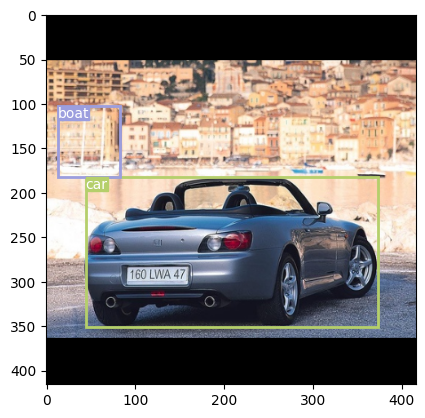

In [ ]:
# Creating a dataset object
dataset = Dataset(
	csv_file="/kaggle/input/pascalvoc-yolo/100examples.csv",
	image_dir="/kaggle/input/pascalvoc-yolo/images",
	label_dir="/kaggle/input/pascalvoc-yolo/labels",
	grid_sizes=[13, 26, 52],
	anchors=ANCHORS,
	transform=test_transform
)

# Creating a dataloader object
loader = torch.utils.data.DataLoader(
	dataset=dataset,
	batch_size=1,
	shuffle=True,
)

# Defining the grid size and the scaled anchors
GRID_SIZE = [13, 26, 52]
scaled_anchors = torch.tensor(ANCHORS) / (
	1 / torch.tensor(GRID_SIZE).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
)

# Getting a batch from the dataloader
x, y = next(iter(loader))

# Getting the boxes coordinates from the labels
# and converting them into bounding boxes without scaling
boxes = []
for i in range(y[0].shape[1]):
	anchor = scaled_anchors[i]
	boxes += convert_cells_to_bboxes(
			y[i], is_predictions=False, s=y[i].shape[2], anchors=anchor
			)[0]

# Applying non-maximum suppression
boxes = nms(boxes, iou_threshold=1, threshold=0.7)

# Plotting the image with the bounding boxes
plot_image(x[0].permute(1,2,0).to("cpu"), boxes)


In [ ]:
# Defining CNN Block
class CNNBlock(nn.Module):
	def __init__(self, in_channels, out_channels, use_batch_norm=True, **kwargs):
		super().__init__()
		self.conv = nn.Conv2d(in_channels, out_channels, bias=not use_batch_norm, **kwargs)
		self.bn = nn.BatchNorm2d(out_channels)
		self.activation = nn.LeakyReLU(0.1)
		self.use_batch_norm = use_batch_norm

	def forward(self, x):
		# Applying convolution
		x = self.conv(x)
		# Applying BatchNorm and activation if needed
		if self.use_batch_norm:
			x = self.bn(x)
			return self.activation(x)
		else:
			return x


In [ ]:
# Defining residual block
class ResidualBlock(nn.Module):
	def __init__(self, channels, use_residual=True, num_repeats=1):
		super().__init__()

		# Defining all the layers in a list and adding them based on number of
		# repeats mentioned in the design
		res_layers = []
		for _ in range(num_repeats):
			res_layers += [
				nn.Sequential(
					nn.Conv2d(channels, channels // 2, kernel_size=1),
					nn.BatchNorm2d(channels // 2),
					nn.LeakyReLU(0.1),
					nn.Conv2d(channels // 2, channels, kernel_size=3, padding=1),
					nn.BatchNorm2d(channels),
					nn.LeakyReLU(0.1)
				)
			]
		self.layers = nn.ModuleList(res_layers)
		self.use_residual = use_residual
		self.num_repeats = num_repeats

	# Defining forward pass
	def forward(self, x):
		for layer in self.layers:
			residual = x
			x = layer(x)
			if self.use_residual:
				x = x + residual
		return x


In [ ]:
# Defining scale prediction class
class ScalePrediction(nn.Module):
	def __init__(self, in_channels, num_classes):
		super().__init__()
		# Defining the layers in the network
		self.pred = nn.Sequential(
			nn.Conv2d(in_channels, 2*in_channels, kernel_size=3, padding=1),
			nn.BatchNorm2d(2*in_channels),
			nn.LeakyReLU(0.1),
			nn.Conv2d(2*in_channels, (num_classes + 5) * 3, kernel_size=1),
		)
		self.num_classes = num_classes

	# Defining the forward pass and reshaping the output to the desired output
	# format: (batch_size, 3, grid_size, grid_size, num_classes + 5)
	def forward(self, x):
		output = self.pred(x)
		output = output.view(x.size(0), 3, self.num_classes + 5, x.size(2), x.size(3))
		output = output.permute(0, 1, 3, 4, 2)
		return output


In [ ]:
# Class for defining YOLOv3 model
class YOLOv3(nn.Module):
	def __init__(self, in_channels=3, num_classes=20):
		super().__init__()
		self.num_classes = num_classes
		self.in_channels = in_channels

		# Layers list for YOLOv3
		self.layers = nn.ModuleList([
			CNNBlock(in_channels, 32, kernel_size=3, stride=1, padding=1),
			CNNBlock(32, 64, kernel_size=3, stride=2, padding=1),
			ResidualBlock(64, num_repeats=1),
			CNNBlock(64, 128, kernel_size=3, stride=2, padding=1),
			ResidualBlock(128, num_repeats=2),
			CNNBlock(128, 256, kernel_size=3, stride=2, padding=1),
			ResidualBlock(256, num_repeats=8),
			CNNBlock(256, 512, kernel_size=3, stride=2, padding=1),
			ResidualBlock(512, num_repeats=8),
			CNNBlock(512, 1024, kernel_size=3, stride=2, padding=1),
			ResidualBlock(1024, num_repeats=4),
			CNNBlock(1024, 512, kernel_size=1, stride=1, padding=0),
			CNNBlock(512, 1024, kernel_size=3, stride=1, padding=1),
			ResidualBlock(1024, use_residual=False, num_repeats=1),
			CNNBlock(1024, 512, kernel_size=1, stride=1, padding=0),
			ScalePrediction(512, num_classes=num_classes),
			CNNBlock(512, 256, kernel_size=1, stride=1, padding=0),
			nn.Upsample(scale_factor=2),
			CNNBlock(768, 256, kernel_size=1, stride=1, padding=0),
			CNNBlock(256, 512, kernel_size=3, stride=1, padding=1),
			ResidualBlock(512, use_residual=False, num_repeats=1),
			CNNBlock(512, 256, kernel_size=1, stride=1, padding=0),
			ScalePrediction(256, num_classes=num_classes),
			CNNBlock(256, 128, kernel_size=1, stride=1, padding=0),
			nn.Upsample(scale_factor=2),
			CNNBlock(384, 128, kernel_size=1, stride=1, padding=0),
			CNNBlock(128, 256, kernel_size=3, stride=1, padding=1),
			ResidualBlock(256, use_residual=False, num_repeats=1),
			CNNBlock(256, 128, kernel_size=1, stride=1, padding=0),
			ScalePrediction(128, num_classes=num_classes)
		])

	# Forward pass for YOLOv3 with route connections and scale predictions
	def forward(self, x):
		outputs = []
		route_connections = []

		for layer in self.layers:
			if isinstance(layer, ScalePrediction):
				outputs.append(layer(x))
				continue
			x = layer(x)

			if isinstance(layer, ResidualBlock) and layer.num_repeats == 8:
				route_connections.append(x)

			elif isinstance(layer, nn.Upsample):
				x = torch.cat([x, route_connections[-1]], dim=1)
				route_connections.pop()
		return outputs


In [ ]:
# Testing YOLO v3 model
if __name__ == "__main__":
	# Setting number of classes and image size
	num_classes = 20
	IMAGE_SIZE = 416

	# Creating model and testing output shapes
	model = YOLOv3(num_classes=num_classes)
	x = torch.randn((1, 3, IMAGE_SIZE, IMAGE_SIZE))
	out = model(x)
	print(out[0].shape)
	print(out[1].shape)
	print(out[2].shape)

	# Asserting output shapes
	assert model(x)[0].shape == (1, 3, IMAGE_SIZE//32, IMAGE_SIZE//32, num_classes + 5)
	assert model(x)[1].shape == (1, 3, IMAGE_SIZE//16, IMAGE_SIZE//16, num_classes + 5)
	assert model(x)[2].shape == (1, 3, IMAGE_SIZE//8, IMAGE_SIZE//8, num_classes + 5)
	print("Output shapes are correct!")


torch.Size([1, 3, 13, 13, 25])
torch.Size([1, 3, 26, 26, 25])
torch.Size([1, 3, 52, 52, 25])
Output shapes are correct!


In [ ]:
# Defining YOLO loss class
class YOLOLoss(nn.Module):
	def __init__(self):
		super().__init__()
		self.mse = nn.MSELoss()
		self.bce = nn.BCEWithLogitsLoss()
		self.cross_entropy = nn.CrossEntropyLoss()
		self.sigmoid = nn.Sigmoid()

	def forward(self, pred, target, anchors):
		# Identifying which cells in target have objects
		# and which have no objects
		obj = target[..., 0] == 1
		no_obj = target[..., 0] == 0

		# Calculating No object loss
		no_object_loss = self.bce(
			(pred[..., 0:1][no_obj]), (target[..., 0:1][no_obj]),
		)


		# Reshaping anchors to match predictions
		anchors = anchors.reshape(1, 3, 1, 1, 2)
		# Box prediction confidence
		box_preds = torch.cat([self.sigmoid(pred[..., 1:3]),
							torch.exp(pred[..., 3:5]) * anchors
							],dim=-1)
		# Calculating intersection over union for prediction and target
		ious = iou(box_preds[obj], target[..., 1:5][obj]).detach()
		# Calculating Object loss
		object_loss = self.mse(self.sigmoid(pred[..., 0:1][obj]),
							ious * target[..., 0:1][obj])


		# Predicted box coordinates
		pred[..., 1:3] = self.sigmoid(pred[..., 1:3])
		# Target box coordinates
		target[..., 3:5] = torch.log(1e-6 + target[..., 3:5] / anchors)
		# Calculating box coordinate loss
		box_loss = self.mse(pred[..., 1:5][obj],
							target[..., 1:5][obj])


		# Claculating class loss
		class_loss = self.cross_entropy((pred[..., 5:][obj]),
								target[..., 5][obj].long())

		# Total loss
		return (
			box_loss
			+ object_loss
			+ no_object_loss
			+ class_loss
		)


In [ ]:
# Define the train function to train the model
def training_loop(loader, model, optimizer, loss_fn, scaler, scaled_anchors):
	# Creating a progress bar
	progress_bar = tqdm(loader, leave=True)

	# Initializing a list to store the losses
	losses = []

	# Iterating over the training data
	for _, (x, y) in enumerate(progress_bar):
		x = x.to(device)
		y0, y1, y2 = (
			y[0].to(device),
			y[1].to(device),
			y[2].to(device),
		)

		with torch.cuda.amp.autocast():
			# Getting the model predictions
			outputs = model(x)
			# Calculating the loss at each scale
			loss = (
				loss_fn(outputs[0], y0, scaled_anchors[0])
				+ loss_fn(outputs[1], y1, scaled_anchors[1])
				+ loss_fn(outputs[2], y2, scaled_anchors[2])
			)

		# Add the loss to the list
		losses.append(loss.item())

		# Reset gradients
		optimizer.zero_grad()

		# Backpropagate the loss
		scaler.scale(loss).backward()

		# Optimization step
		scaler.step(optimizer)

		# Update the scaler for next iteration
		scaler.update()

		# update progress bar with loss
		mean_loss = sum(losses) / len(losses)
		progress_bar.set_postfix(loss=mean_loss)


Epoch: 1


100%|██████████| 4/4 [00:01<00:00,  2.07it/s, loss=14.3]


==> Saving checkpoint
Epoch: 2


100%|██████████| 4/4 [00:02<00:00,  1.99it/s, loss=14.1]


==> Saving checkpoint
Epoch: 3


100%|██████████| 4/4 [00:01<00:00,  2.03it/s, loss=13.9]


==> Saving checkpoint
Epoch: 4


100%|██████████| 4/4 [00:01<00:00,  2.04it/s, loss=13.7]


==> Saving checkpoint
Epoch: 5


100%|██████████| 4/4 [00:01<00:00,  2.02it/s, loss=13.4]


==> Saving checkpoint
Epoch: 6


100%|██████████| 4/4 [00:01<00:00,  2.05it/s, loss=13.2]


==> Saving checkpoint
Epoch: 7


100%|██████████| 4/4 [00:01<00:00,  2.03it/s, loss=12.9]


==> Saving checkpoint
Epoch: 8


100%|██████████| 4/4 [00:01<00:00,  2.01it/s, loss=13.1]


==> Saving checkpoint
Epoch: 9


100%|██████████| 4/4 [00:02<00:00,  1.99it/s, loss=12.3]


==> Saving checkpoint
Epoch: 10


100%|██████████| 4/4 [00:01<00:00,  2.03it/s, loss=13]


==> Saving checkpoint
Epoch: 11


100%|██████████| 4/4 [00:01<00:00,  2.02it/s, loss=12.4]


==> Saving checkpoint
Epoch: 12


100%|██████████| 4/4 [00:01<00:00,  2.03it/s, loss=12.2]


==> Saving checkpoint
Epoch: 13


100%|██████████| 4/4 [00:02<00:00,  2.00it/s, loss=12.1]


==> Saving checkpoint
Epoch: 14


100%|██████████| 4/4 [00:01<00:00,  2.02it/s, loss=12.2]


==> Saving checkpoint
Epoch: 15


100%|██████████| 4/4 [00:01<00:00,  2.05it/s, loss=11.9]


==> Saving checkpoint
Epoch: 16


100%|██████████| 4/4 [00:01<00:00,  2.00it/s, loss=12.1]


==> Saving checkpoint
Epoch: 17


100%|██████████| 4/4 [00:02<00:00,  2.00it/s, loss=11.6]


==> Saving checkpoint
Epoch: 18


100%|██████████| 4/4 [00:02<00:00,  1.94it/s, loss=12.1]


==> Saving checkpoint
Epoch: 19


100%|██████████| 4/4 [00:02<00:00,  1.99it/s, loss=11.6]


==> Saving checkpoint
Epoch: 20


100%|██████████| 4/4 [00:01<00:00,  2.00it/s, loss=11.3]


==> Saving checkpoint
==> Loading checkpoint


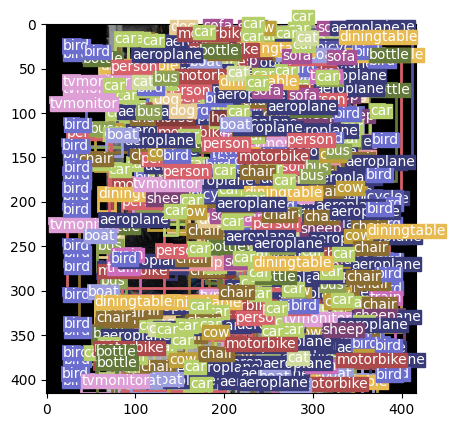

In [ ]:
# Creating the model from YOLOv3 class
model = YOLOv3().to(device)

# Defining the optimizer
optimizer = optim.Adam(model.parameters(), lr = leanring_rate)

# Defining the loss function
loss_fn = YOLOLoss()

# Defining the scaler for mixed precision training
scaler = torch.cuda.amp.GradScaler()

# Defining the train dataset
train_dataset = Dataset(
	csv_file="/kaggle/input/pascalvoc-yolo/100examples.csv",
	image_dir="/kaggle/input/pascalvoc-yolo/images",
	label_dir="/kaggle/input/pascalvoc-yolo/labels",
	anchors=ANCHORS,
	transform=train_transform
)

# Defining the train data loader
train_loader = torch.utils.data.DataLoader(
	train_dataset,
	batch_size = batch_size,
	num_workers = 2,
	shuffle = True,
	pin_memory = True,
)

# Scaling the anchors
scaled_anchors = (
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2)
).to(device)

# Training the model
for e in range(1, epochs+1):
	print("Epoch:", e)
	training_loop(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors)

	# Saving the model
	if save_model:
		save_checkpoint(model, optimizer, filename=f"checkpoint.pth.tar")
# Taking a sample image and testing the model

# Setting the load_model to True
load_model = True

# Defining the model, optimizer, loss function and scaler
model = YOLOv3().to(device)
optimizer = optim.Adam(model.parameters(), lr = leanring_rate)
loss_fn = YOLOLoss()
scaler = torch.cuda.amp.GradScaler()

# Loading the checkpoint
if load_model:
	load_checkpoint(checkpoint_file, model, optimizer, leanring_rate)

# Defining the test dataset and data loader
test_dataset = Dataset(
	csv_file="/kaggle/input/pascalvoc-yolo/8examples.csv",
	image_dir="/kaggle/input/pascalvoc-yolo/images",
	label_dir="/kaggle/input/pascalvoc-yolo/labels",
	anchors=ANCHORS,
	transform=test_transform
)
test_loader = torch.utils.data.DataLoader(
	test_dataset,
	batch_size = 1,
	num_workers = 2,
	shuffle = True,
)

# Getting a sample image from the test data loader
x, y = next(iter(test_loader))
x = x.to(device)

model.eval()
with torch.no_grad():
	# Getting the model predictions
	output = model(x)
	# Getting the bounding boxes from the predictions
	bboxes = [[] for _ in range(x.shape[0])]
	anchors = (
			torch.tensor(ANCHORS)
				* torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1, 3, 2)
			).to(device)

	# Getting bounding boxes for each scale
	for i in range(3):
		batch_size, A, S, _, _ = output[i].shape
		anchor = anchors[i]
		boxes_scale_i = convert_cells_to_bboxes(
							output[i], anchor, s=S, is_predictions=True
						)
		for idx, (box) in enumerate(boxes_scale_i):
			bboxes[idx] += box
model.train()

# Plotting the image with bounding boxes for each image in the batch
for i in range(batch_size):
	# Applying non-max suppression to remove overlapping bounding boxes
	nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
	# Plotting the image with bounding boxes
	plot_image(x[i].permute(1,2,0).detach().cpu(), nms_boxes)


In [ ]:
import torch

# Define the path where you want to save the model
model_save_path = "/kaggle/yolov3_model.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to /kaggle/yolov3_model.pth


# New section

In [ ]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import torch
from tqdm import tqdm
import random

def calculate_metrics(outputs, targets):
    # Initialize accumulators for true positives, false positives, false negatives
    TP = 0
    FP = 0
    FN = 0

    # Iterate over each output and corresponding target
    for output, target in zip(outputs, targets):
        # Extract the objectness score and reshape for comparison
        objectness_pred = output[..., 0].reshape(-1)
        objectness_target = target[..., 0].reshape(-1)

        # Apply a threshold to get the predicted labels (objectness)
        predicted = (objectness_pred > 0.5).float()

        # Calculate True Positives (TP), False Positives (FP), False Negatives (FN)
        TP += (predicted * objectness_target).sum().item()
        FP += ((1 - objectness_target) * predicted).sum().item()
        FN += (objectness_target * (1 - predicted)).sum().item()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)
    f1_score = 2 * precision * recall / (precision + recall + 1e-6)

    # Calculate mAP
    mAP = calculate_mAP(outputs, targets)

    return precision, recall, f1_score, mAP

def calculate_mAP(outputs, targets):
    # Initialize accumulators for precision and recall
    total_precision = 0
    total_recall = 0
    num_classes = len(targets)

    # Iterate over each output and corresponding target
    for output, target in zip(outputs, targets):

        objectness_pred = output[..., 0].reshape(-1)
        objectness_target = target[..., 0].reshape(-1)

        predicted = (objectness_pred > 0.5).float()

        TP = (predicted * objectness_target).sum().item()
        FP = ((1 - objectness_target) * predicted).sum().item()
        FN = (objectness_target * (1 - predicted)).sum().item()

        precision = TP / (TP + FP + 1e-6)
        recall = TP / (TP + FN + 1e-6)

        total_precision += precision
        total_recall += recall

    # Calculate average precision and recall
    average_precision = total_precision / num_classes
    average_recall = total_recall / num_classes
    mAP = (average_precision + average_recall) / 2

    return mAP

def training_loop(loader, model, optimizer, loss_fn, scaler, scaled_anchors):
    # Creating a progress bar
    progress_bar = tqdm(loader, leave=True)

    # Initializing a list to store the losses and metrics
    losses = []
    precisions = []
    recalls = []
    f1_scores = []
    mAPs = []

    # Iterating over the training data
    for _, (x, y) in enumerate(progress_bar):
        x = x.to(device)
        y0, y1, y2 = (
            y[0].to(device),
            y[1].to(device),
            y[2].to(device),
        )

        with torch.cuda.amp.autocast():
            # Getting the model predictions
            outputs = model(x)
            # Calculating the loss at each scale
            loss = (
                loss_fn(outputs[0], y0, scaled_anchors[0])
                + loss_fn(outputs[1], y1, scaled_anchors[1])
                + loss_fn(outputs[2], y2, scaled_anchors[2])
            )

        # Add the loss to the list
        losses.append(loss.item())

        # Reset gradients
        optimizer.zero_grad()

        # Backpropagate the loss
        scaler.scale(loss).backward()

        # Optimization step
        scaler.step(optimizer)

        # Update the scaler for next iteration
        scaler.update()

        # Calculate precision, recall, f1_score, and mAP
        precision, recall, f1_score, mAP = calculate_metrics(outputs, [y0, y1, y2])
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1_score)
        mAPs.append(mAP)

        # Update progress bar with loss
        mean_loss = sum(losses) / len(losses)
        progress_bar.set_postfix(loss=mean_loss)

    return mean_loss, precisions, recalls, f1_scores, mAPs

# Training loop
for e in range(1, epochs + 1):
    print("Epoch:", e)
    mean_loss, precisions, recalls, f1_scores, mAPs = training_loop(
        train_loader, model, optimizer, loss_fn, scaler, scaled_anchors
    )
    # Log the metrics to WandB
    wandb.log({
        "epoch": e,
        "loss": mean_loss,
        "precision": sum(precisions) / len(precisions),
        "recall": sum(recalls) / len(recalls),
        "f1_score": sum(f1_scores) / len(f1_scores),
        "mAP": sum(mAPs) / len(mAPs)
    })


Epoch: 1


100%|██████████| 4/4 [00:02<00:00,  1.91it/s, loss=9.17]


Epoch: 2


100%|██████████| 4/4 [00:02<00:00,  1.94it/s, loss=8.64]


Epoch: 3


100%|██████████| 4/4 [00:02<00:00,  1.94it/s, loss=8.96]


Epoch: 4


100%|██████████| 4/4 [00:02<00:00,  1.91it/s, loss=8.85]


Epoch: 5


100%|██████████| 4/4 [00:02<00:00,  1.94it/s, loss=8.21]


Epoch: 6


100%|██████████| 4/4 [00:02<00:00,  1.95it/s, loss=8.53]


Epoch: 7


100%|██████████| 4/4 [00:02<00:00,  1.97it/s, loss=8.62]


Epoch: 8


100%|██████████| 4/4 [00:02<00:00,  1.93it/s, loss=8.36]


Epoch: 9


100%|██████████| 4/4 [00:02<00:00,  1.91it/s, loss=8.66]


Epoch: 10


100%|██████████| 4/4 [00:02<00:00,  1.91it/s, loss=8.27]


Epoch: 11


100%|██████████| 4/4 [00:02<00:00,  1.95it/s, loss=7.81]


Epoch: 12


100%|██████████| 4/4 [00:02<00:00,  1.92it/s, loss=7.8]


Epoch: 13


100%|██████████| 4/4 [00:02<00:00,  1.96it/s, loss=8.18]


Epoch: 14


100%|██████████| 4/4 [00:02<00:00,  1.92it/s, loss=8.28]


Epoch: 15


100%|██████████| 4/4 [00:02<00:00,  1.93it/s, loss=8.17]


Epoch: 16


100%|██████████| 4/4 [00:02<00:00,  1.92it/s, loss=8.54]


Epoch: 17


100%|██████████| 4/4 [00:02<00:00,  1.91it/s, loss=7.89]


Epoch: 18


100%|██████████| 4/4 [00:02<00:00,  1.93it/s, loss=7.72]


Epoch: 19


100%|██████████| 4/4 [00:02<00:00,  1.95it/s, loss=7.97]


Epoch: 20


100%|██████████| 4/4 [00:02<00:00,  1.90it/s, loss=7.86]


In [ ]:
import wandb

# Initialize wandb
wandb.init(project="your_project_name", name="yolov3_training")

epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
f1_score,▂▄▂▁▃▃▄▂▄▂▂▆▂▅▃█▁▄▆▂
loss,█▅▇▆▃▅▅▄▆▄▁▁▃▄▃▅▂▁▂▂
mAP,▂▄▂▁▁▄▃▂▄▁▂▆▁▅▃█▁▄▅▂
precision,▂▄▂▁▃▃▄▂▄▂▂▆▂▅▃█▁▄▆▂
recall,▂▄▂▁▂▃▄▂▄▁▂▄▂▄▂█▁▂▅▁
epoch,20
f1_score,0.00024
loss,7.86323
mAP,0.00418
precision,0.00013


In [ ]:
import torch

# Define the path where you want to save the model
model_save_path = "/kaggle/yolov3_model-new.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")
